## impoto fanction


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


#Classificatio


In [ ]:
fmnist_data =  keras.datasets.fashion_mnist

In [ ]:
(x_train , y_train) , (x_test , y_test) =  fmnist_data.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

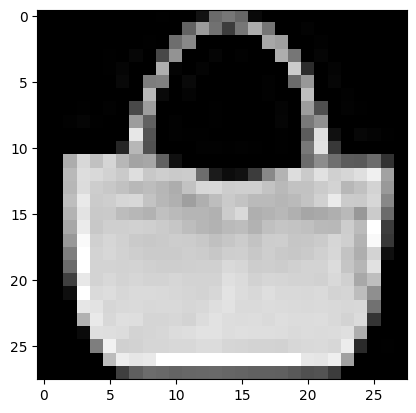

In [ ]:
plt.imshow(x_train[100],cmap  = "gray")


In [ ]:
x_train ,  x_tast  =  x_train/255.0, x_test/255.0


In [ ]:
# model = keras.models.Sequential([
#     keras.layers.Dense(100,activation="relu"),
#     keras.layers.Dense(75,activation="relu"),
#     keras.layers.Dense(10,activation="softmax")
# ])
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
weights, bias = model.layers[1].get_weights()


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )
history =  model.fit(x_train,y_train , epochs= 50 , validation_split=0.15)


Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.6377 - loss: 1.1270 - val_accuracy: 0.8120 - val_loss: 0.5543
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8214 - loss: 0.5225 - val_accuracy: 0.8317 - val_loss: 0.4902
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8367 - loss: 0.4738 - val_accuracy: 0.8419 - val_loss: 0.4564
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8431 - loss: 0.4414 - val_accuracy: 0.8521 - val_loss: 0.4259
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8498 - loss: 0.4241 - val_accuracy: 0.8528 - val_loss: 0.4136
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8608 - loss: 0.3947 - val_accuracy: 0.8583 - val_loss: 0.4133
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8649 - loss: 0.3894 - val_accuracy: 0.8597 - val_loss: 0.4069
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8681 - loss: 0.3776

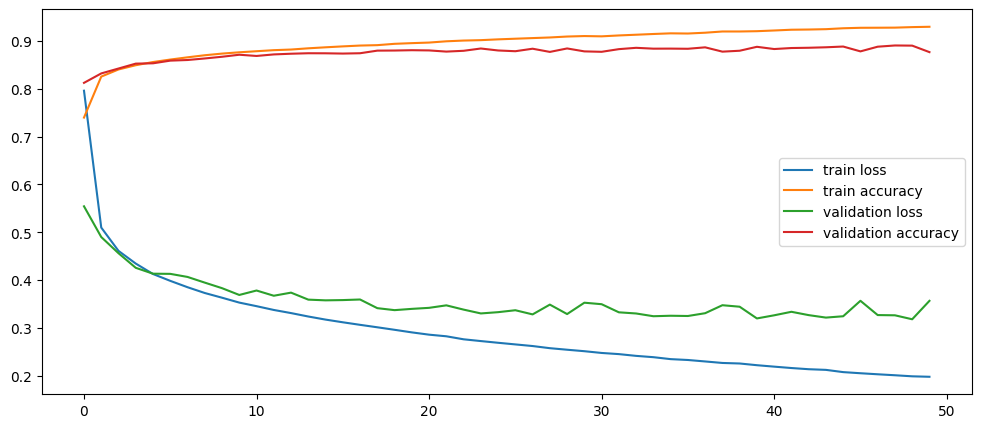

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [ ]:
x3 =  x_test[1:3]
x3.shape


(2, 28, 28)

In [ ]:
model.predict(x3).round(3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model.predict(x3).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


(2, 10)

In [ ]:
print("modell")
x = np.argmax(model.predict(x3).round(3),axis =  1)
for i in x :
  if i ==  1 :
    print("Trouser")
  if i  ==  2:
    print("Pullover")
  if i ==  3 :
    print("Dress")
  if i ==  4 :
    print("Coat")

  if i ==  5:
    print("Sandal")
  if i ==  6 :
    print("Shirt")
  if i ==  7 :
    print("Sneaker")


modell
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Pullover
Trouser
